In [28]:
#Importando las librerías y módulos
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt

In [29]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data(path='mnist.npz') #Cargando el dataset MNIST
train_images, test_images = train_images / 255.0, test_images / 255.0

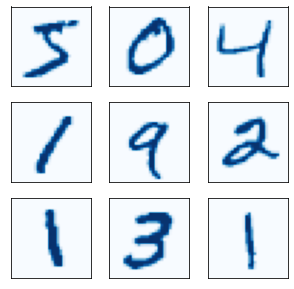

In [31]:
plt.figure(figsize=(5,5))                     #Tamaño de las imágenes
for i in range(9):                            #Cantidad de datos/imágenes
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Blues') #Muestreo y color
plt.show()

In [32]:
(train_images.shape, train_labels.shape), (test_images.shape, test_labels.shape) #Cantidad de datos y dimensiones del Dataset

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [33]:
#Cambiando el tamaño de las imágenes
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#Codificando la variable deseada
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [34]:
#Definiendo la arquitectura del modelo
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 4)         148       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 4)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 1,198
Trainable params: 1,198
Non-trainable params: 0
____________________________________________________

In [36]:
#Compilando el modelo
model.compile(optimizer='adam', #Adam es el algoritmo de optimización que une AdaGrad y RMSprop
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
#Entrenando el modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4784 - accuracy: 0.8474 - val_loss: 0.1782 - val_accuracy: 0.9494
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1712 - accuracy: 0.9478 - val_loss: 0.1318 - val_accuracy: 0.9604
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1403 - accuracy: 0.9577 - val_loss: 0.1164 - val_accuracy: 0.9632
Epoch 4/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1244 - accuracy: 0.9618 - val_loss: 0.1042 - val_accuracy: 0.9679
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1144 - accuracy: 0.9649 - val_loss: 0.1044 - val_accuracy: 0.9677
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1079 - accuracy: 0.9666 - val_loss: 0.0920 - val_accuracy: 0.9717
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1017 - accuracy: 0.9689 - val_loss: 0.0888 -

Gracias a este entrenamiento, se reduce la pérdida o error y se aumenta la precisión

In [77]:
#indice = 181
#example = test_images[indice].reshape((28,28))
#plt.imshow(example, cmap = "Blues")

In [99]:
#Usando una nueva imagen
from PIL import Image
from keras_preprocessing import image
from keras.preprocessing.image import load_img, img_to_array

def pred(numero):
  x = image.load_img(numero, target_size=(28, 28))
  plt.imshow(x)

  x = image.img_to_array(x)        #Convierte la imagen a un arreglo para su lectura
  x = tf.image.rgb_to_grayscale(x) #Pone la imagen a escala de grises
  x = np.expand_dims(x, axis=0)    #Agrega un nuevo eje para facilitar el proceso
  x = x/255.0

  prediccion = model.predict(x) #Función de predicción de Keras
  a = prediccion [0][0]
  for i in range (0,10):
      b = prediccion [0][i]
  print("El número es: ", np.argmax(prediccion[0]))
  return

El número es:  4


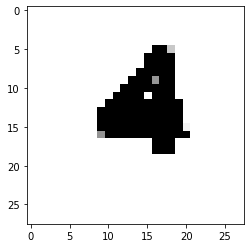

In [106]:
pred("4.png")

Cargué al rededor de 15 imagenes. A veces todas me las dio correctas, a veces ninguna, no sé por qué. Con "A veces" me refiero a cuando cerraba y abría el Colab.